In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread
import spacy 
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
data=pd.read_csv('trump tweets.csv')
data

,content
0,Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...
3,New Blog Post: Celebrity Apprentice Finale and...
4,"""My persona will never be that of a wallflower..."
...,...
2942,It's Wednesday. I wonder how much money @ Bara...
2943,Here's a sneak peek at the @ DNC convention th...
2944,"""Change is not a destination, just as hope is ..."
2945,One of the best moves I made early in my caree...


In [5]:
data=[content.strip() for content in data.content]

In [6]:
data=[content for content in data if content]
data 

['Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!',
 'Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!',
 'Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!',
 'New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e',
 '"My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump',
 'Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald Trump',
 'Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl',
 '"Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm',
 'Enter the "Think Like A Champion" signed book and keycha

In [10]:
data_join=" ".join(data)
data_join 

'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight! Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion! Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny! New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e "My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald Trump Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl "Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm Enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthink

In [11]:
data_no_pun=data_join.translate(str.maketrans(" "," ",string.punctuation))
data_no_pun

'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman httptinyurlcomooafwn  Very funny New Blog Post Celebrity Apprentice Finale and Lessons Learned Along the Way httptinyurlcomqlux5e My persona will never be that of a wallflower  I’d rather build walls than cling to them Donald J Trump Miss USA Tara Conner will not be fired  Ive always been a believer in second chances says Donald Trump Listen to an interview with Donald Trump discussing his new book Think Like A Champion httptinyurlcomqs24vl Strive for wholeness and keep your sense of wonder intact Donald J Trump httptinyurlcompqpfvm Enter the Think Like A Champion signed book and keychain contest httpwwwtrumpthinklikeachampioncomcontest When the achiever achieves its

In [13]:
data_token=word_tokenize(data_no_pun)
print(data_token)

['Be', 'sure', 'to', 'tune', 'in', 'and', 'watch', 'Donald', 'Trump', 'on', 'Late', 'Night', 'with', 'David', 'Letterman', 'as', 'he', 'presents', 'the', 'Top', 'Ten', 'List', 'tonight', 'Donald', 'Trump', 'will', 'be', 'appearing', 'on', 'The', 'View', 'tomorrow', 'morning', 'to', 'discuss', 'Celebrity', 'Apprentice', 'and', 'his', 'new', 'book', 'Think', 'Like', 'A', 'Champion', 'Donald', 'Trump', 'reads', 'Top', 'Ten', 'Financial', 'Tips', 'on', 'Late', 'Show', 'with', 'David', 'Letterman', 'httptinyurlcomooafwn', 'Very', 'funny', 'New', 'Blog', 'Post', 'Celebrity', 'Apprentice', 'Finale', 'and', 'Lessons', 'Learned', 'Along', 'the', 'Way', 'httptinyurlcomqlux5e', 'My', 'persona', 'will', 'never', 'be', 'that', 'of', 'a', 'wallflower', 'I', '’', 'd', 'rather', 'build', 'walls', 'than', 'cling', 'to', 'them', 'Donald', 'J', 'Trump', 'Miss', 'USA', 'Tara', 'Conner', 'will', 'not', 'be', 'fired', 'Ive', 'always', 'been', 'a', 'believer', 'in', 'second', 'chances', 'says', 'Donald', 'Tr

In [16]:
my_stopwords=stopwords.words('english')
print(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
data_no_stop_word=[word for word in data_token if not word in my_stopwords]
print(data_no_stop_word)

['Be', 'sure', 'tune', 'watch', 'Donald', 'Trump', 'Late', 'Night', 'David', 'Letterman', 'presents', 'Top', 'Ten', 'List', 'tonight', 'Donald', 'Trump', 'appearing', 'The', 'View', 'tomorrow', 'morning', 'discuss', 'Celebrity', 'Apprentice', 'new', 'book', 'Think', 'Like', 'A', 'Champion', 'Donald', 'Trump', 'reads', 'Top', 'Ten', 'Financial', 'Tips', 'Late', 'Show', 'David', 'Letterman', 'httptinyurlcomooafwn', 'Very', 'funny', 'New', 'Blog', 'Post', 'Celebrity', 'Apprentice', 'Finale', 'Lessons', 'Learned', 'Along', 'Way', 'httptinyurlcomqlux5e', 'My', 'persona', 'never', 'wallflower', 'I', '’', 'rather', 'build', 'walls', 'cling', 'Donald', 'J', 'Trump', 'Miss', 'USA', 'Tara', 'Conner', 'fired', 'Ive', 'always', 'believer', 'second', 'chances', 'says', 'Donald', 'Trump', 'Listen', 'interview', 'Donald', 'Trump', 'discussing', 'new', 'book', 'Think', 'Like', 'A', 'Champion', 'httptinyurlcomqs24vl', 'Strive', 'wholeness', 'keep', 'sense', 'wonder', 'intact', 'Donald', 'J', 'Trump', '

In [20]:
data_lower=[word.lower() for word in data_no_stop_word]
print(data_lower)

['be', 'sure', 'tune', 'watch', 'donald', 'trump', 'late', 'night', 'david', 'letterman', 'presents', 'top', 'ten', 'list', 'tonight', 'donald', 'trump', 'appearing', 'the', 'view', 'tomorrow', 'morning', 'discuss', 'celebrity', 'apprentice', 'new', 'book', 'think', 'like', 'a', 'champion', 'donald', 'trump', 'reads', 'top', 'ten', 'financial', 'tips', 'late', 'show', 'david', 'letterman', 'httptinyurlcomooafwn', 'very', 'funny', 'new', 'blog', 'post', 'celebrity', 'apprentice', 'finale', 'lessons', 'learned', 'along', 'way', 'httptinyurlcomqlux5e', 'my', 'persona', 'never', 'wallflower', 'i', '’', 'rather', 'build', 'walls', 'cling', 'donald', 'j', 'trump', 'miss', 'usa', 'tara', 'conner', 'fired', 'ive', 'always', 'believer', 'second', 'chances', 'says', 'donald', 'trump', 'listen', 'interview', 'donald', 'trump', 'discussing', 'new', 'book', 'think', 'like', 'a', 'champion', 'httptinyurlcomqs24vl', 'strive', 'wholeness', 'keep', 'sense', 'wonder', 'intact', 'donald', 'j', 'trump', '

In [21]:
nlp=spacy.load('en_core_web_sm')

In [22]:
data_doc=nlp(' '.join(data_no_stop_word))
data_doc

Be sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight Donald Trump appearing The View tomorrow morning discuss Celebrity Apprentice new book Think Like A Champion Donald Trump reads Top Ten Financial Tips Late Show David Letterman httptinyurlcomooafwn Very funny New Blog Post Celebrity Apprentice Finale Lessons Learned Along Way httptinyurlcomqlux5e My persona never wallflower I ’ rather build walls cling Donald J Trump Miss USA Tara Conner fired Ive always believer second chances says Donald Trump Listen interview Donald Trump discussing new book Think Like A Champion httptinyurlcomqs24vl Strive wholeness keep sense wonder intact Donald J Trump httptinyurlcompqpfvm Enter Think Like A Champion signed book keychain contest httpwwwtrumpthinklikeachampioncomcontest When achiever achieves plateau ’ beginning Donald J Trump httptinyurlcompqpfvm Don ’ afraid unique like afraid best self Donald J Trump httptinyurlcompqpfvm We win lives champions view moment 

In [24]:
lemmas=[token.lemma_ for token in data_doc]
print(lemmas)

['be', 'sure', 'tune', 'watch', 'Donald', 'Trump', 'Late', 'Night', 'David', 'Letterman', 'present', 'Top', 'Ten', 'List', 'tonight', 'Donald', 'Trump', 'appear', 'the', 'View', 'tomorrow', 'morning', 'discuss', 'Celebrity', 'Apprentice', 'new', 'book', 'think', 'like', 'a', 'Champion', 'Donald', 'Trump', 'read', 'Top', 'ten', 'Financial', 'Tips', 'Late', 'Show', 'David', 'Letterman', 'httptinyurlcomooafwn', 'very', 'funny', 'New', 'Blog', 'Post', 'Celebrity', 'Apprentice', 'Finale', 'Lessons', 'learn', 'along', 'way', 'httptinyurlcomqlux5e', 'my', 'persona', 'never', 'wallflow', 'I', '’', 'rather', 'build', 'wall', 'cle', 'Donald', 'J', 'Trump', 'Miss', 'USA', 'Tara', 'Conner', 'fire', 'I', 've', 'always', 'believer', 'second', 'chance', 'say', 'Donald', 'Trump', 'Listen', 'interview', 'Donald', 'Trump', 'discuss', 'new', 'book', 'think', 'like', 'a', 'Champion', 'httptinyurlcomqs24vl', 'strive', 'wholeness', 'keep', 'sense', 'wonder', 'intact', 'Donald', 'J', 'Trump', 'httptinyurlcom

In [27]:
vector=CountVectorizer()
x=vector.fit_transform(lemmas)

In [28]:
print(vector.vocabulary_)

{'be': 760, 'sure': 6263, 'tune': 6638, 'watch': 6897, 'donald': 1726, 'trump': 6598, 'late': 4234, 'night': 4793, 'david': 1496, 'letterman': 4284, 'present': 5264, 'top': 6520, 'ten': 6362, 'list': 4333, 'tonight': 6511, 'appear': 561, 'the': 6387, 'view': 6819, 'tomorrow': 6508, 'morning': 4656, 'discuss': 1684, 'celebrity': 1084, 'apprentice': 573, 'new': 4763, 'book': 875, 'think': 6431, 'like': 4308, 'champion': 1105, 'read': 5448, 'financial': 2150, 'tips': 6489, 'show': 5943, 'httptinyurlcomooafwn': 3270, 'very': 6798, 'funny': 2301, 'blog': 847, 'post': 5225, 'finale': 2147, 'lessons': 4280, 'learn': 4259, 'along': 459, 'way': 6903, 'httptinyurlcomqlux5e': 3272, 'my': 4699, 'persona': 5111, 'never': 4762, 'wallflow': 6864, 'rather': 5429, 'build': 954, 'wall': 6861, 'cle': 1189, 'miss': 4590, 'usa': 6749, 'tara': 6314, 'conner': 1333, 'fire': 2161, 've': 6787, 'always': 467, 'believer': 783, 'second': 5840, 'chance': 1107, 'say': 5789, 'listen': 4334, 'interview': 3980, 'httpt

In [29]:
print(vector.get_feature_names())
print(x.toarray())

['01', '06', '07', '08', '09', '10', '100', '1000', '100000', '1000000', '100barrel', '1011pm', '102barrel', '1030', '1030930', '1030930c', '105', '106', '107', '109b', '10b', '10pm', '10th', '11', '1121', '1124', '1130', '1145', '118', '11th', '12', '120', '1200', '1227', '1230', '1235', '125', '1250', '1299', '12be', '12pm', '12trillion', '13', '13b', '13billion', '14', '140', '147', '148', '149', '14b', '14th', '15', '150', '150000', '157', '15b', '15th', '15trillion', '16', '164trillion', '169b', '16th', '17', '170', '175', '175000', '176', '18', '180', '18008683401', '1849', '18th', '19', '19000', '191', '19152012httponmsnbccomn1hgky', '1920s', '1960s', '1961', '1981', '1991', '1999', '1999httpbitlyjahqw0', '19th', '1am', '1b', '1billion', '1mhttpbitlyoefyki', '1st', '1trillion', '20', '200', '2000', '20000', '2001', '2003', '2004', '2005', '2007', '20072010', '2008', '2008httpbitlyo9qhrj', '2008httpbitlyy6leuc', '2009', '2010', '2011', '2011httpabcnwstnrmll', '2012', '2012httpbit

# plot of the word cloud

In [30]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,40))
    plt.imshow(wordcloud)
    plt.axis('off');

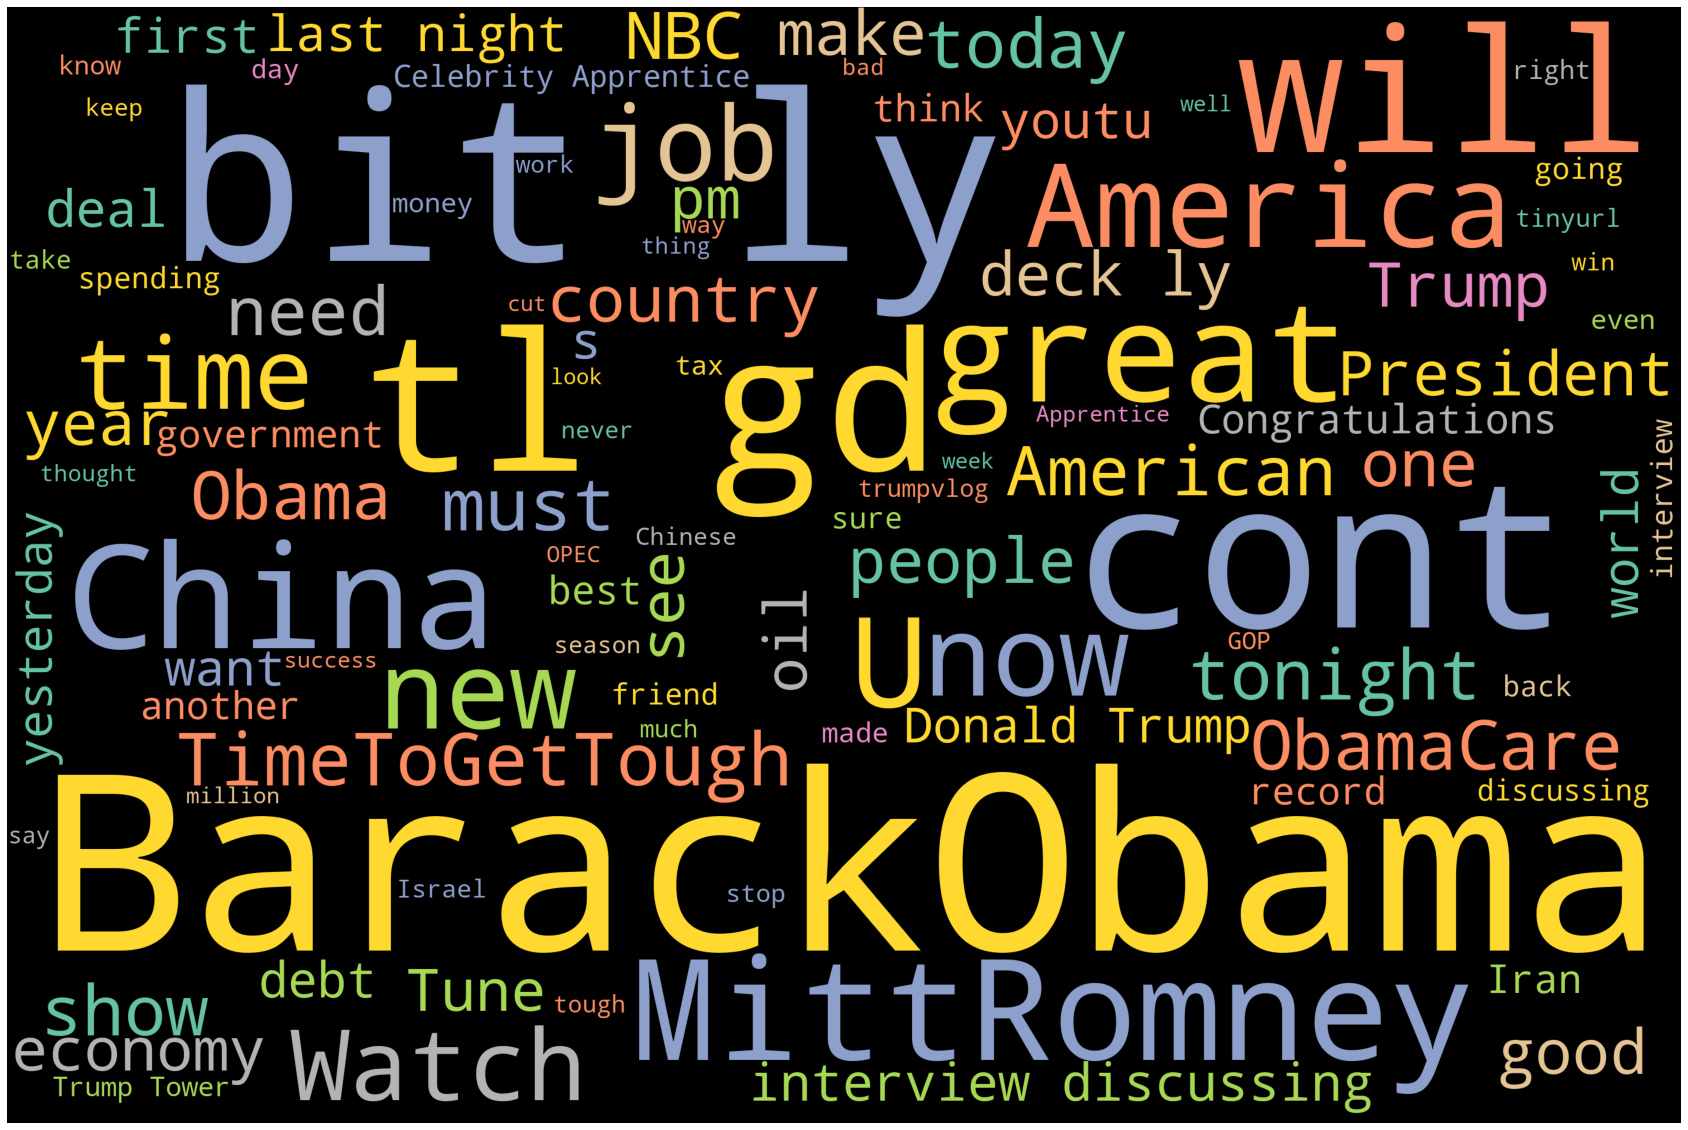

In [33]:
stopwords=STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(data_join)
plot_cloud(wordcloud)


# performing the emotion mining

In [35]:
afinn=pd.read_csv('Afinn.csv',sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [38]:
sentence=tokenize.sent_tokenize(" ".join(data))
sentence

['Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!',
 'Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!',
 'Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!',
 'New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e "My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances."',
 'says Donald Trump Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl "Strive for wholeness and keep your sense of wonder intact."',
 '--Donald J. Trump http://tinyurl.com/pqpfvm Enter the "Think Like A Champion" signed book and keychain contest: 

In [39]:
sentence_df=pd.DataFrame(sentence,columns=['sentence'])
sentence_df

,sentence
0,Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...
3,New Blog Post: Celebrity Apprentice Finale and...
4,says Donald Trump Listen to an interview with ...
...,...
3278,"""Change is not a destination, just as hope is ..."
3279,-- Rudy Giuliani One of the best moves I made ...
3280,Trump Tower gleams over Fifth Avenue.
3281,It's sad to see once decent newspapers like @ ...


In [40]:
affinity_score=afinn.set_index('word')['value'].to_dict()

In [41]:
sentiment_lexicon=affinity_score
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [42]:
sentence_df['sentiment_value']=sentence_df['sentence'].apply(calculate_sentiment)

In [43]:
sentence_df['word_count'] = sentence_df['sentence'].str.split().apply(len)
sentence_df

,sentence,sentiment_value,word_count
0,Be sure to tune in and watch Donald Trump on L...,0,23
1,Donald Trump will be appearing on The View tom...,2,22
2,Donald Trump reads Top Ten Financial Tips on L...,4,17
3,New Blog Post: Celebrity Apprentice Finale and...,0,51
4,says Donald Trump Listen to an interview with ...,4,29
...,...,...,...
3278,"""Change is not a destination, just as hope is ...",2,12
3279,-- Rudy Giuliani One of the best moves I made ...,5,22
3280,Trump Tower gleams over Fifth Avenue.,0,6
3281,It's sad to see once decent newspapers like @ ...,-5,13


In [44]:
sentence_df.sort_values(by='sentiment_value',ascending=False)

,sentence,sentiment_value,word_count
344,GOP has its best chance to make a great deal I...,14,32
1666,Doral Tournament was great--best 18th hole in ...,13,26
33,Trump International Tower in Chicago ranked 6t...,13,35
275,Did my weekly phoner on Fox & Friends this mor...,12,50
1781,They come to watch stars--great exciting playe...,12,12
...,...,...,...
1312,“It’s sad—truly sad and disgraceful—the way Ob...,-10,53
2731,Penn State is doing a poor job in bringing its...,-10,24
1689,"""When your secretary of defense tells you that...",-11,34
3149,The Huffington Post is such a loser--it will d...,-11,23


In [45]:
sentence_df['sentiment_value'].describe()

count    3283.000000
mean        0.468169
std         2.677542
min       -13.000000
25%        -1.000000
50%         0.000000
75%         2.000000
max        14.000000
Name: sentiment_value, dtype: float64

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

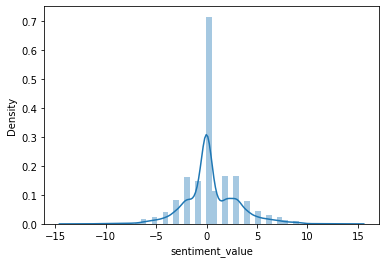

In [46]:
sns.distplot(sentence_df.sentiment_value)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment_value', ylabel='word_count'>

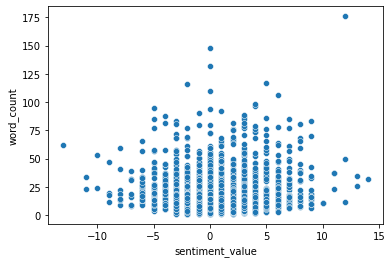

In [47]:
sns.scatterplot(sentence_df.sentiment_value,sentence_df.word_count)